# Day 11 – Visualization (Matplotlib / Seaborn)
### Business Dashboards & KPI Visualization

In this notebook, we’ll explore:
- Visualizing business KPIs using Matplotlib & Seaborn
- Detecting outliers and patterns visually
- Designing dashboard-style charts

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Create a sample dataset to avoid URL issues
np.random.seed(42) # for reproducibility
num_rows = 1000
data = {
    'Category': np.random.choice(['Technology', 'Office Supplies', 'Furniture'], num_rows),
    'Region': np.random.choice(['West', 'East', 'Central', 'South'], num_rows),
    'Sales': np.random.lognormal(mean=6, sigma=1.2, size=num_rows),
    'Discount': np.random.choice([0.0, 0.1, 0.2, 0.3, 0.5], num_rows, p=[0.5, 0.2, 0.2, 0.05, 0.05])
}
df = pd.DataFrame(data)

# Calculate Profit based on Sales and Discount
# Introducing some variability and potential losses
profit_margin = np.random.normal(loc=0.1, scale=0.15, size=num_rows)
df['Profit'] = df['Sales'] * (profit_margin - df['Discount'] / 2)

# Ensure Sales and Profit have 2 decimal places
df[['Sales', 'Profit']] = df[['Sales', 'Profit']].round(2)

# Quick check
df.head()


,Category,Region,Sales,Discount,Profit
0,Furniture,Central,78.90,0.0,13.81
1,Technology,Central,987.82,0.0,-108.56
2,Furniture,Central,875.31,0.1,92.04
3,Furniture,Central,5409.47,0.0,-1163.06
4,Technology,South,278.85,0.1,40.11


## 1. Data Overview

In [14]:
df.info()
df.describe()[['Sales','Profit','Discount']]
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1000 non-null   object 
 1   Region    1000 non-null   object 
 2   Sales     1000 non-null   float64
 3   Discount  1000 non-null   float64
 4   Profit    1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


Category    0
Region      0
Sales       0
Discount    0
Profit      0
dtype: int64

## 2. Sales & Profit Distributions

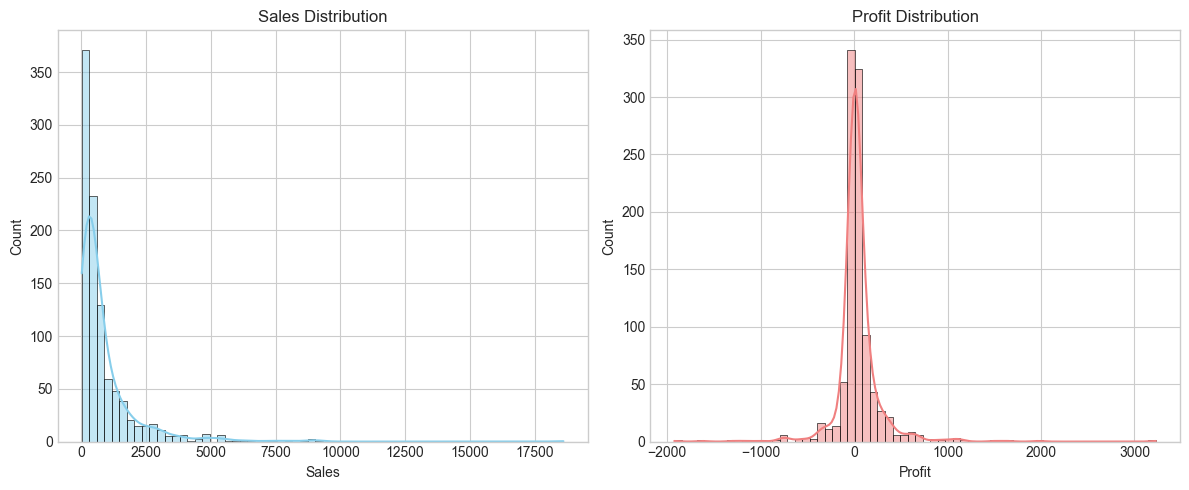

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['Sales'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Sales Distribution')
sns.histplot(df['Profit'], kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Profit Distribution')
plt.tight_layout()
plt.show()

## 3. Outlier Detection (Boxplots)

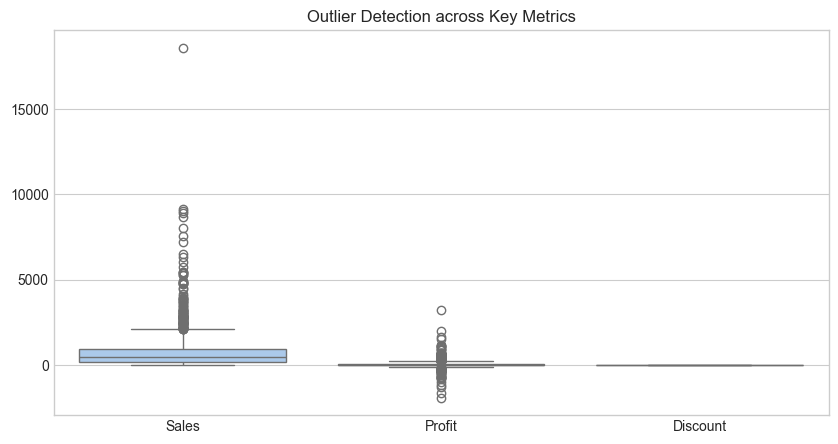

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Sales','Profit','Discount']], palette='pastel')
plt.title('Outlier Detection across Key Metrics')
plt.show()

## 4. Category-wise KPI Visualization

C:\Users\vedav\AppData\Local\Temp\ipykernel_27960\2591057161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, palette='Blues_d')


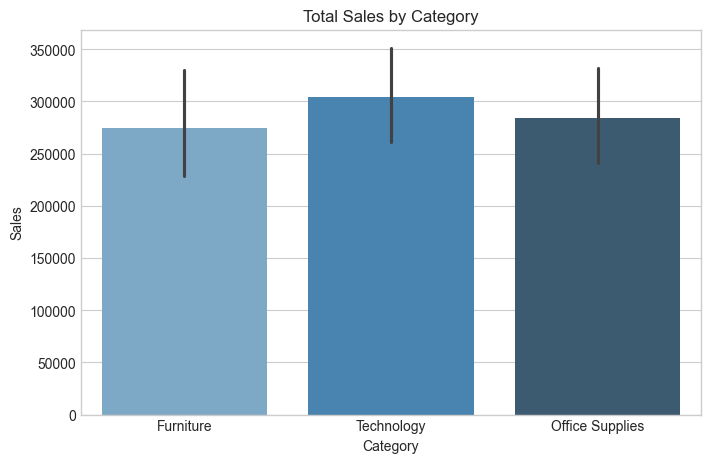

C:\Users\vedav\AppData\Local\Temp\ipykernel_27960\2591057161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='Greens_d')


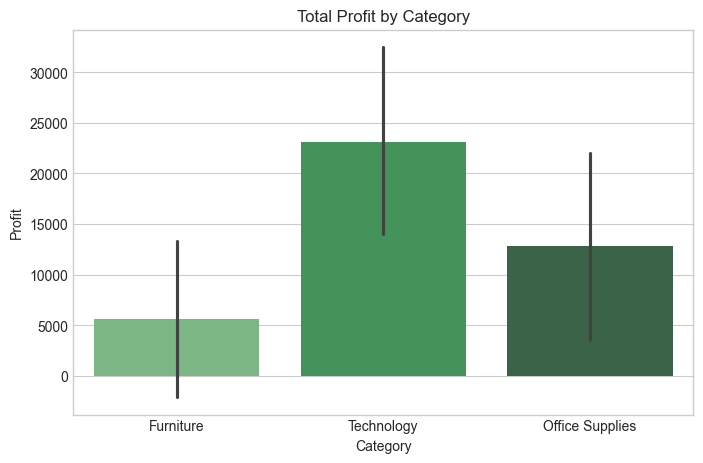

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, palette='Blues_d')
plt.title('Total Sales by Category')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='Greens_d')
plt.title('Total Profit by Category')
plt.show()

## 5. Regional Sales Dashboard Snapshot

C:\Users\vedav\AppData\Local\Temp\ipykernel_27960\2080479806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, ax=axes[0], palette='cool')
C:\Users\vedav\AppData\Local\Temp\ipykernel_27960\2080479806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, ax=axes[1], palette='mako')
C:\Users\vedav\AppData\Local\Temp\ipykernel_27960\2080479806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Discount', data=df, ax=axes[2], palette='rocket')


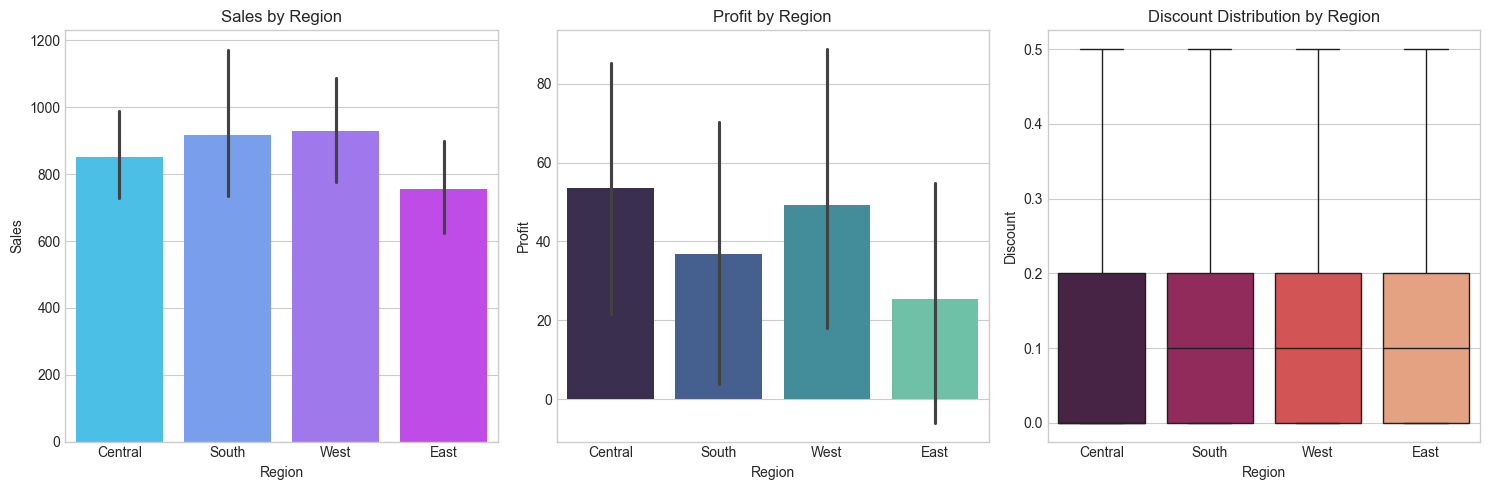

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x='Region', y='Sales', data=df, ax=axes[0], palette='cool')
axes[0].set_title('Sales by Region')
sns.barplot(x='Region', y='Profit', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Profit by Region')
sns.boxplot(x='Region', y='Discount', data=df, ax=axes[2], palette='rocket')
axes[2].set_title('Discount Distribution by Region')
plt.tight_layout()
plt.show()

## 6. Insights & Summary
- Visualization reveals **sales outliers** and **regional trends** quickly.
- **Boxplots** highlight heavy discount anomalies.
- **Category-wise barplots** help identify high-performing segments.
- These visuals can be directly integrated into dashboards for executives.